[1. 2. 3. 4. 5. 6. 7.]


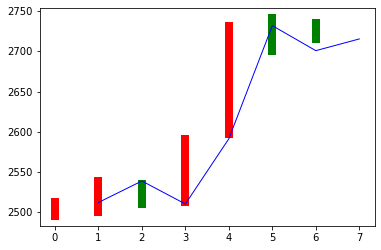

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,7,7)
endprice = np.array([2511.89,2538.64,2510.00,2591.21,2732.01,2700.86,2715.44])
beginprice = np.array([2495.17,2500.12,2534.55,2512.55,2597.41,2741.20,2735.21])
print(date)
plt.figure()
for i in range(0,7):
    #柱状
    dataone = np.zeros([2])
    dataone[0]=i
    dataone[1]=i
    priceone = np.zeros([2])
    priceone[0]=beginprice[i]
    priceone[1]=endprice[i]
    if endprice[i]>beginprice[i]:
        plt.plot(dataone,priceone,'r',lw=8)
    else:
        plt.plot(dataone,priceone,'g',lw=8)
#plt.show()
datenormal=np.zeros([7,1])
pricenormal=np.zeros([7,1])
for i in range(0,7):
    datenormal[i,0]=i/6.0
    pricenormal[i,0]=endprice[i]/3000
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])
#B
w1=tf.Variable(tf.random_uniform([1,10],0,1))
b1=tf.Variable(tf.zeros([1,10]))
wb1=tf.matmul(x,w1)+b1
layer1=tf.nn.relu(wb1)  #激励函数
#C
w2=tf.Variable(tf.random_uniform([10,1],0,1))
b2=tf.Variable(tf.zeros([7,1]))
wb2=tf.matmul(layer1,w2)+b2
layer2=tf.nn.relu(wb2)
loss=tf.reduce_mean(tf.square(y-layer2))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000):
        sess.run(train_step,feed_dict={x:datenormal,y:pricenormal})
    pred=sess.run(layer2,feed_dict={x:datenormal})
    predprice=np.zeros([7,1])
    for i in range(0,7):
        predprice[i,0]=(pred*3000)[i,0]
    plt.plot(date,predprice,'b',lw=1)
plt.show()